In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [3]:
#create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///hawaii.sqlite")

In [4]:
#reflect an existing database into a new model
Base = automap_base()

In [5]:
#Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
#Show tables
Base.classes.keys()

[]

In [6]:
#Identify columns/data types in measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

In [7]:
#Identify columns/data types in station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

In [8]:
#Assign the measurement and station classes to variables called `Measurement` and 'Station'
Measurement = Base.classes.measurement
Station = Base.classes.station

AttributeError: measurement

In [9]:
#Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#Find the most recent date
first_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(first_date)

NameError: name 'Measurement' is not defined

In [11]:
#Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
#Print date
print(last_year)

2016-08-23


In [12]:
#Perform a query to retrieve the data and precipitation scores from last year in data set
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
for record in data:
    print(record)


NameError: name 'Measurement' is not defined

In [13]:
#Save the query results as a Pandas DataFrame
precip_df = pd.DataFrame(data, columns = ["date", "prcp"])
#Set date column as index
precip_df.set_index("date", inplace=True)
#View Data
precip_df.head(25)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [14]:
#Sort the dataframe by date
precip_sort_df = precip_df.sort_values(["date"])
precip_sort_df.head(25)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


In [15]:
#Remove NaN values from prcp column
precip_sort_df.dropna(axis=0, how="any", inplace=True)
precipitation = pd.DataFrame(precip_sort_df)
#View dataframe
precipitation.head(5000)


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


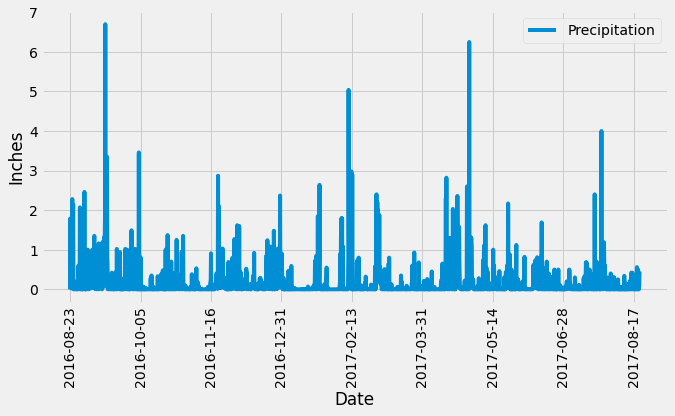

In [16]:
precipitation.plot(figsize=(10,5), fontsize=14, rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"])

#Save figure as .png and show 
plt.savefig("Precipitation.png")
plt.show()

In [17]:
#Calculate statistics for precipitation data
stats = precipitation["prcp"].describe()
stats = pd.DataFrame(stats)
stats


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).group_by(Station.station).count()


9

In [19]:
#Design a query to find the most active stations (i.e. what stations have the most rows?)
#List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#Selects top station number and first column value (excludes count)
most_active = stations[0][0]

#Calculates min temperature for most active station
low_temp = session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == most_active).scalar()

#Calculates max temperature for most active station
high_temp = session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == most_active).scalar()

#Calculates max temperature for most active station
avg_temp = session.query(func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active).scalar()

#Prints out temperature statistics for the most active station
print (f'The lowest temperature for station {most_active} is {low_temp} F')
print (f'The highest temperature for station {most_active} is {high_temp} F')
print (f'The average temperature for station {most_active} is {round(avg_temp, 1)} F')


The lowest temperature for station USC00519281 is 54.0 F
The highest temperature for station USC00519281 is 85.0 F
The average temperature for station USC00519281 is 71.7 F


In [21]:
#Using the most active station id, Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram

#Filtering data to show only temperatures for most active stations for the past 12 months
temp_obs = session.query(Measurement.tobs).filter(Measurement.station== most_active).\
filter(Measurement.date>=last_year).all()

#View filtered temperature observation data
temp_obs

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [22]:
#Create dataframe for last 12 months of temperature data to plot histogram with
temperature = pd.DataFrame(temp_obs, columns=["tobs"])
temperature.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


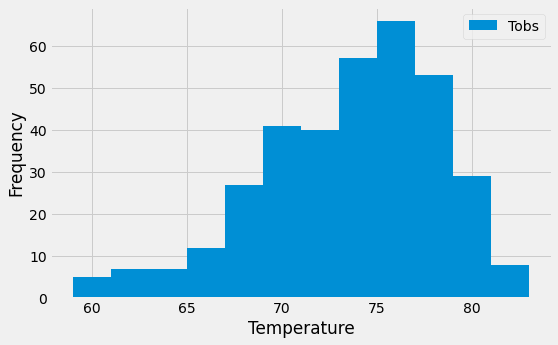

In [23]:
#Plot dataframe results as a histogram
plt.figure(figsize=(8,5))
plt.hist(temperature["tobs"],bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])

#Save figure as .png and show histogram
plt.savefig("frequency.png")
plt.show()

# Close session

In [24]:
#Close Session
session.close()